In [0]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving india.csv to india.csv


In [0]:
#THE DATA THAT PROVIDES US THE STATEWISE CONFIRMED , CURED AND DEATH CASES 
import io
df = pd.read_csv(io.BytesIO(uploaded['india.csv']))
df_india = df.copy()
df

,S. No.,Name of State,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,1,0
1,2,Bihar,4,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,37,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,14,0,0,0


In [0]:
#WE CLEAN THE DATA AND MANIPULATE IT
df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (25th March, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (25th March, 2020): 606


In [0]:
#THE BELOW GRAPH SHOWS THE INTENSITY OF THE CASES ACROSS INDIA
df.style.background_gradient(cmap='Reds')

,Name of State,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,1,0,9
1,Bihar,4,0,0,1,4
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,37,1,0,1,38
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,14,0,0,0,14


In [0]:
# THE ACTIVE CASES IN ASCENDING ORDER TO SEE WHICH STATE IS MOST AFFECTED
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State ')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 553


,Total Active
Name of State,
Maharashtra,124
Kerala,105
Gujarat,37
Karnataka,37
Telengana,34
Rajasthan,33
Punjab,28
Uttar Pradesh,26
Delhi,24


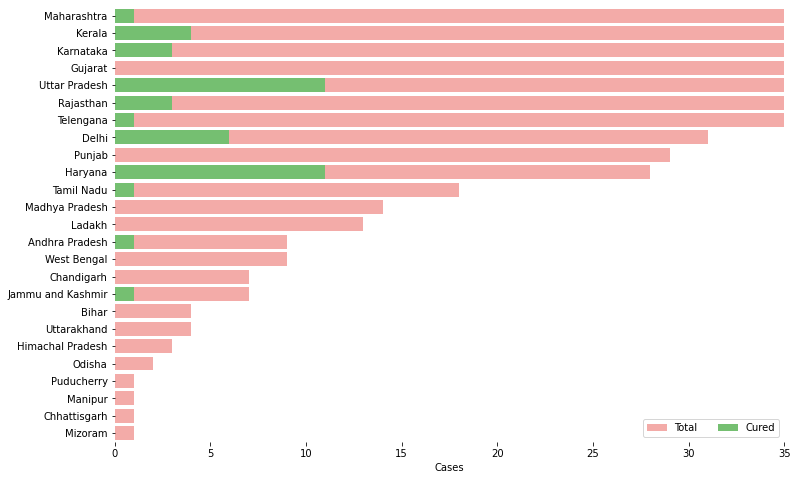

In [0]:
#THE BELOW GRAPH SHOWS THE RECOVERY AND CONFIRMED CASES ACROSS INDIA
f, ax = plt.subplots(figsize=(12, 8))
data = df[['Name of State ','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State ", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State ", data=data, label="Cured", color="g")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [49]:
uploaded = files.upload()

Saving COVID-19 Cases.csv to COVID-19 Cases (1).csv


In [0]:
#Day by day data of India, Korea, Italy,US and China
dbd= pd.read_csv(io.BytesIO(uploaded['COVID-19 Cases.csv']))
dbd_India=dbd[dbd['Country_Region']=='India']
dbd_China=dbd[dbd['Country_Region']=='China']
dbd_Italy=dbd[dbd['Country_Region']=='Italy']
dbd_Korea=dbd[dbd['Country_Region']=='Korea']
dbd_US=dbd[dbd['Country_Region']=='US']

In [0]:
import plotly
plotly.io.renderers.default = 'colab'

In [52]:
#WE SEE A CUMULATIVE GRAPH OF CONFIRMED CASES IN INDIA AND SEE A EXPONENTIAL GROWTH IN THE INCREASE OF CASES
fig = go.Figure()
dbd_India_confirmed=dbd_India[dbd_India['Case_Type']=='Confirmed']
case_India = dbd_India_confirmed.groupby('Date')['Cases'].sum().sort_values(ascending=True).to_frame()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = case_India['Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

import plotly.express as px
fig = px.bar(x=dbd_India_confirmed['Date'].unique(), y=case_India, barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [96]:
#WE CAN INDIVIDUALLY STUDY THE SPREAD OF COVID-19 IN INDIA , ITALY , SOUTH KOREA , CHINA, AND US
import plotly.express as px
fig =px.bar(x=dbd_India_confirmed['Date'], y=case_India, color=case_India, orientation='v', height=600,title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)


fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

dbd_Italy_confirmed=dbd_Italy[dbd_Italy['Case_Type']=='Confirmed']
case_Italy = dbd_Italy_confirmed.groupby('Date')['Cases'].sum().sort_values(ascending=True).to_frame()
fig = px.bar(x=dbd_India_confirmed['Date'], y=case_Italy, color=case_Italy, orientation='v', height=600,title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

dbd_Korea_confirmed=dbd_Korea[dbd_Korea['Case_Type']=='Confirmed']
case_Korea = dbd_Korea_confirmed.groupby('Date')['Cases'].sum().sort_values(ascending=True).to_frame()
fig = px.bar(x=dbd_Korea_confirmed['Date'], y=case_Korea, color=case_Korea, orientation='v', height=600,title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

dbd_China_confirmed=dbd_China[dbd_China['Case_Type']=='Confirmed']
case_China = dbd_China_confirmed.groupby('Date')['Cases'].sum().sort_values(ascending=True).to_frame()
fig = px.bar(x=dbd_China_confirmed['Date'].unique( ), y=case_China, color=case_China, orientation='v', height=600,title='Confirmed Cases in China', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

dbd_US_confirmed=dbd_US[dbd_US['Case_Type']=='Confirmed']
case_US = dbd_US_confirmed.groupby('Date')['Cases'].sum().sort_values(ascending=True).to_frame()
fig = px.bar(x=dbd_US_confirmed['Date'].unique(), y=case_US, color=case_US, orientation='v', height=600,title='Confirmed Cases in US', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


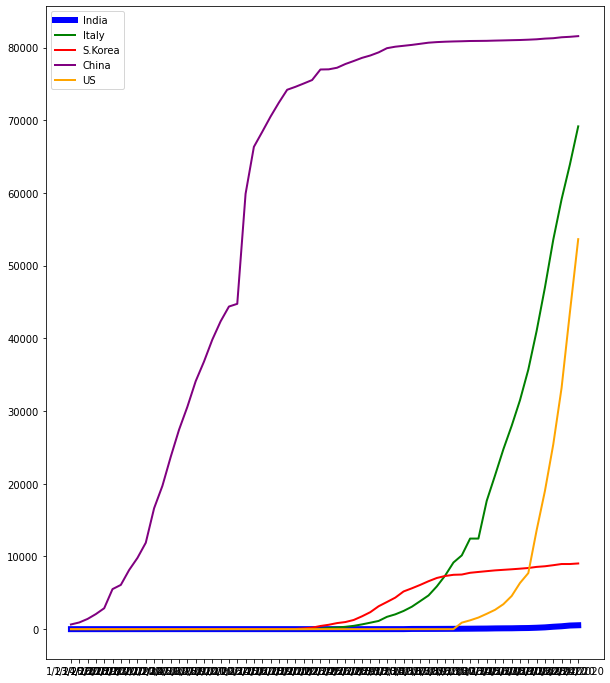

In [79]:
#COMPARITIVE STUDY TO SEE THE SPREAD OF COVID-19 , SO FAR INDIA SEEMS TO BE DOING BETTER THAN OTHER COUNTRIES
labels = ['India', 'Italy','S.Korea' ,'China','US']
colors = ['blue','green','red','purple','orange']
line_size = [6,2, 2, 2,2]
 
   
plt.plot( dbd_India_confirmed['Date'], case_India, marker='', color=colors[0], linewidth=line_size[0], linestyle='-', label=labels[0])
plt.plot( dbd_India_confirmed['Date'], case_Italy, marker='', color=colors[1], linewidth=line_size[1], linestyle='-', label=labels[1])
plt.plot( dbd_India_confirmed['Date'], case_Korea, marker='', color=colors[2], linewidth=line_size[2], linestyle='-', label=labels[2])
plt.plot( dbd_India_confirmed['Date'], case_China, marker='', color=colors[3], linewidth=line_size[3], linestyle='-', label=labels[3])
plt.plot( dbd_India_confirmed['Date'], case_US, marker='', color=colors[4], linewidth=line_size[4], linestyle='-', label=labels[4])
plt.legend()


In [0]:
#WE NOW TRY TO PREDICT THE CONFIRMED CASES IN INDIA USING PROPHET
from fbprophet import Prophet

In [0]:
dbd_India_confirmed=dbd_India[dbd_India['Case_Type']=='Confirmed']
case_India_confirmed= dbd_India_confirmed.groupby('Date')['Cases'].sum().sort_values(ascending=True).to_frame()
dbd_India_death=dbd_India[dbd_India['Case_Type']=='Death']
case_India_death = dbd_India_death.groupby('Date')['Cases'].sum().sort_values(ascending=True).to_frame()
confirmed = case_India_confirmed.reset_index()
deaths =case_India_death.reset_index()


In [91]:
#predicting the future with date, and upper and lower limit of y value
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
57,2020-03-20,244
58,2020-03-21,330
59,2020-03-22,396
60,2020-03-23,499
61,2020-03-24,536


In [86]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-27
65,2020-03-28
66,2020-03-29
67,2020-03-30
68,2020-03-31


In [89]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
64,2020-03-27,188.453935,20.229904,351.185116
65,2020-03-28,200.592882,40.585076,376.555751
66,2020-03-29,209.842478,28.169047,382.966597
67,2020-03-30,222.757614,65.958076,383.914978
68,2020-03-31,230.894134,69.691284,407.789451


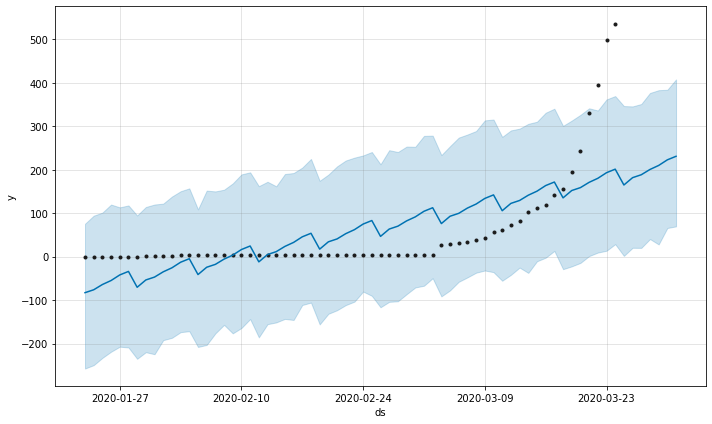

In [90]:
confirmed_forecast_plot = m.plot(forecast)

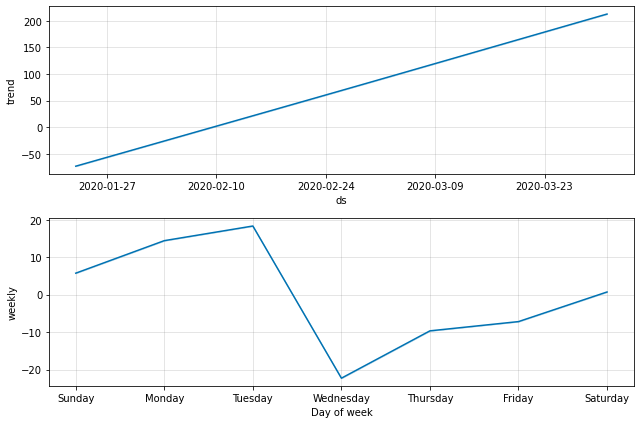

In [92]:
confirmed_forecast_plot =m.plot_components(forecast)

Since there are no vaccine or medicine developed the curfew imposed by the government is our safest chance to break the chain and stop the covid-19 spread.


The data is taken from :
https://www.mohfw.gov.in/
https://download.data.world/file_download/covid-19-data-resource-hub/covid-19-case-counts/COVID-19%20Cases.csv